In this notebook, we will look at two parts, clustering and recommender system.

In the first part, we will go through `KMeans` and `DBSCAN` algorithm to cluster `Starbucks` location geographically. We will use `scikit-learn` for implementation and `matplotlib` for visualisation.

In the second part, we will consider recommender systems with decomposition

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Clustering

First, let's look at the data for clustering

In [2]:
# Read csv with pandas, index indicates whether the first column is an index
data = pd.read_csv("data/starbucks_locations.csv", index_col=0)
data = data.dropna()

print(data.head())

              Longitude  Latitude
Store Number                     
47370-257954       1.53     42.51
22331-212325      55.47     25.42
47089-256771      55.47     25.39
22126-218024      54.38     24.48
17127-178586      54.54     24.51


In [3]:
# Reduce data for computability. just keep first 200
# data = data[:200]

# or reduce data to just some part of the planet
new_data = data[(data["Longitude"].between(49, 51)) & (data["Latitude"].between(26, 27))]

new_data

,Longitude,Latitude
Store Number,,
47088-256773,50.52,26.21
21603-213405,50.59,26.23
17255-179926,50.60,26.20
17189-179925,50.58,26.22
15439-161444,50.57,26.21
47377-258065,50.55,26.22
26955-246149,50.59,26.23
21148-209545,50.60,26.22
34324-95973,50.61,26.21


Now we can use `scikit-learn` to implement both `k-means` and `DBSCAN`. 

## K-means

In [4]:
# K-means with 10 neighbours and 500 iterations
kmeans = KMeans(10, max_iter=500)

print('Start K-means: ')
kmeans.fit(data)
print("Cluster centroids: " + str(kmeans.cluster_centers_))

Start K-means: 
Cluster centroids: [[  -3.15507692   39.82284615]
 [-121.03074426   48.38368631]
 [ 126.02455016   33.73285868]
 [ -79.84520635   38.66999555]
 [ -97.76973568   33.16480491]
 [  40.68921359   34.71940777]
 [ -62.85792176  -25.41293399]
 [-118.97456903   35.05706838]
 [ 109.56894027   12.05451349]
 [   2.58381463   51.82191677]]


To visualise the results, we need to write a plot function:

In [18]:
def graphClusters(all_data, labels, centers):
    # open a color map (cmap) which is a collection of colors which you can fetch by index (i.e. an integer)
    cmap = plt.get_cmap(name='tab10')
    
    # add the color as a new column in the dataframe and add the cluster labels
    all_data['color'] = labels
    
    # add the centroids (in case of K-means) to the plot by adding their coordinates  
    # example pyplot use: plt.plot(x, y, 'bo', linestyle='dashed')
    # example pyplot use: plt.plot(x, y,  color='blue', marker='o', linestyle='dashed')
    # more here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#main-content
    
    which_centroid = 0
    if centers:
        for center in centers:     
            plt.plot(center[0],center[1], marker='o',label='centroid_'+str(which_centroid),
                     markersize=10,color=cmap(which_centroid))
            which_centroid += 1
    
    # add all the data points and use their label number to fetch a certain color
    # index is    
    for ind,row in all_data.iterrows():
        plt.plot(row['Longitude'],row['Latitude'], marker='o', color=cmap(int(row['color'])), markersize=2)
        
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

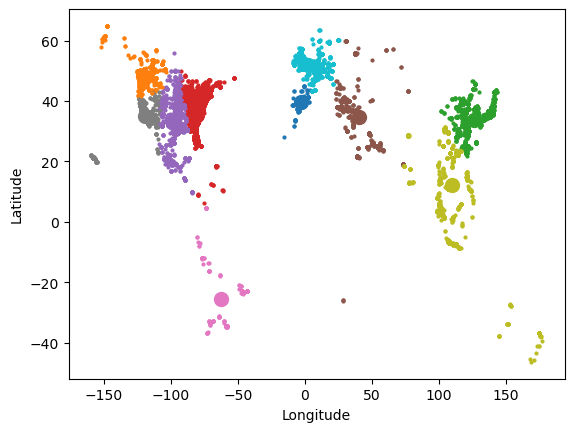

In [19]:
# The visulisation requires a long time, please be patient. Or you can try new_data or any other subset of original dataset
graphClusters(data,kmeans.labels_,list(kmeans.cluster_centers_))

## Open questions: why is it 10 clusters? How about less or more? Why iteration = 500? Is it possible to have less iterations?

The best tutorial of a Python library is always the official documentation, for example, `K-means`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## DBSCAN

In [20]:
dbscan = DBSCAN(eps=10,min_samples=80)

print('Start DBSCAN: ')
dbscan.fit(data)
print("Labels: "+str(set(dbscan.labels_)))

Start DBSCAN: 
Labels: {0, 1, 2, 3, 4, 5, 6, -1}


Looking at the results below, and think about it

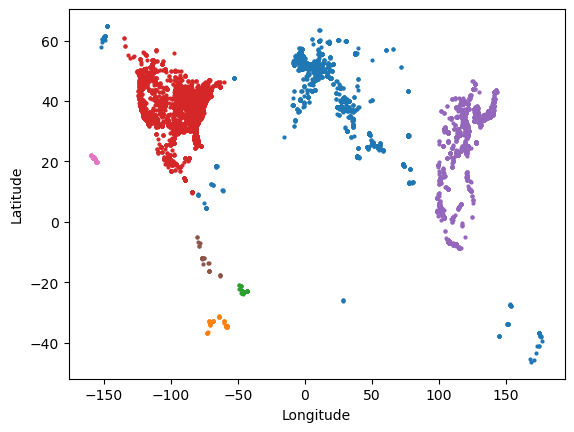

In [21]:
# The visulisation requires a long time, please be patient. Or you can try new_data or any other subset of original dataset
graphClusters(data,dbscan.labels_,[])
# the blue points are alll outliers

As we discussed in the lecture, DBSCAN will finally find the outliers. In this case, -1 means the outlier. So we can revise the plot function to show the outliers.

In [22]:
def graphClusters_DBSCAN(all_data, labels, centers):
    # open a color map (cmap) which is a collection of colors which you can fetch by index (i.e. an integer)
    cmap = plt.get_cmap(name='tab10')
    
    # add the color as a new column in the dataframe and add the cluster labels
    all_data['color'] = labels
    
    # add the centroids (in case of K-means) to the plot by adding their coordinates  
    # example pyplot use: plt.plot(x, y, 'bo', linestyle='dashed')
    # example pyplot use: plt.plot(x, y,  color='blue', marker='o', linestyle='dashed')
    # more here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#main-content
    
    which_centroid = 0
    if centers:
        for center in centers:     
            plt.plot(center[0],center[1], marker='o',label='centroid_'+str(which_centroid),
                     markersize=10,color=cmap(which_centroid))
            which_centroid += 1
    
    # add all the data points and use their label number to fetch a certain color
    # index is    
    for ind,row in all_data.iterrows():
        if row['color'] !=-1:
            plt.plot(row['Longitude'],row['Latitude'], marker='o', color=cmap(int(row['color'])), markersize=2)
        else:
                plt.plot(row['Longitude'],row['Latitude'], marker='x', color='black', markersize=5)
        
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

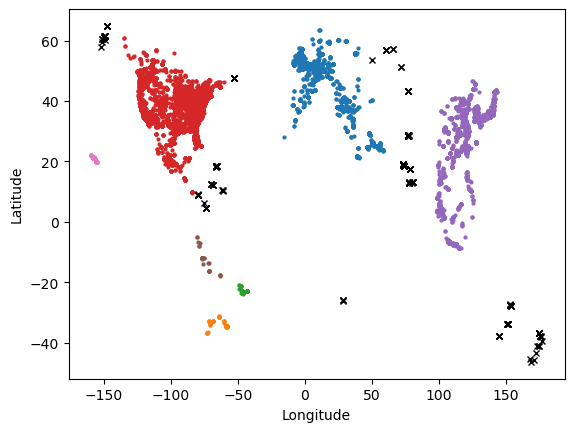

In [23]:
# The visulisation requires a long time, please be patient. Or you can try new_data or any other subset of original dataset
graphClusters_DBSCAN(data,dbscan.labels_,[])
# the black stars are alll outliers

## Open questions: Can you try other eps and min_sample to improve the results of clustering?

The best tutorial of a Python library is always the official documentation, for example, `DBSCAN`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# Recommender system with decomposition

We can also consider decomposition. 
We convert the utility matrix $M (r \times m)$ into $M' = UV^T \approx M$  with $U (r \times l)$ and $V^T (l \times m)$.

In [11]:
from sklearn.decomposition import NMF

loading the dataset

In [12]:
# load data
ratings = pd.read_csv('data/ratings.csv')

# sample dataset
# be careful, once again a very heavy operation
ratings = ratings[:1000]

print(ratings.head())

# print some information
noMovies = len(ratings['movieId'].unique())
noUsers = len(ratings['userId'].unique())
print(str(noMovies)+" from "+str(noUsers)+' users')

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
698 from 11 users


Do some pre-processing before we carefully look at it.

In [13]:
# create empty utility matrix
utility = np.zeros(shape=(noUsers,noMovies))

# store movieIds as indices to use in utility matrix
movieIds = {}
midi = 0
for value in ratings['movieId'].unique():
    movieIds[value]=midi
    midi = midi + 1

# populate utility matrix
for index, line in ratings.iterrows():
    uid = int(line['userId'])-1
    mid = movieIds[line['movieId']]
    rating = line['rating']
    utility[uid,mid]=rating

Now let's do the matrix factorisation with `scikit-learn`:

In [21]:
decomposition = NMF(n_components=50, init='random', random_state=2025, max_iter=500)
U = decomposition.fit_transform(utility)
V_T = decomposition.components_

In [22]:
print('Shape of U (#reviewers x #latent factors): ', np.shape(U))
print('Shape of V_T (#latent factors x #movies): ', np.shape(V_T))

Shape of U (#reviewers x #latent factors):  (11, 50)
Shape of V_T (#latent factors x #movies):  (50, 698)


Now we can calculate $M'$:

In [23]:
M_ = np.dot(U, V_T)
print(np.shape(M_))

(11, 698)


We can see how more dimensions provide a closer approximation of the original matrix:

In [24]:
# Please be patient, this code is very slow (5 mins).
# You can try some small values on range() or max_iter
for n_comp in range(20,201,10):
    decomposition = NMF(n_components=n_comp, init='random', random_state=2025, max_iter=500)
    U = decomposition.fit_transform(utility)
    V_T = decomposition.components_
    M_ = np.dot(U, V_T)
    
    # calculate difference between both matrices
    diff = utility-M_
    print(f"for {n_comp} components,\tdifference was {np.sum(diff)}")
    
print("Completed!") # this will run for a while, up to a minute or two.


for 20 components,	difference was -2.2860846369228995
for 30 components,	difference was -1.065043980260381
for 40 components,	difference was -1.4317665903625723
for 50 components,	difference was -0.11193875183742155


/opt/conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


for 60 components,	difference was -0.005556214624960304
for 70 components,	difference was -1.2160258064367286
for 80 components,	difference was -0.06644828625234285
for 90 components,	difference was -0.7306242958837894
for 100 components,	difference was -1.0302290716116815
for 110 components,	difference was -2.2923538249743087
for 120 components,	difference was -1.8467942272615043
for 130 components,	difference was -1.38379007467878
for 140 components,	difference was -1.3363583196972104
for 150 components,	difference was -1.1308926151308711
for 160 components,	difference was -0.771621811746229


/opt/conda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


for 170 components,	difference was -0.0038390514643688875
for 180 components,	difference was -0.7606427229184402
for 190 components,	difference was -0.8429921559168154
for 200 components,	difference was -0.5897388822514844
Completed!


What does mean of the warning above?

more reading here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

What do you see? is the difference between matrixes getting larger or smaller? is that good?

## Open Questions: Can you store all `diff` and plot a figure, the number of components vs diff, and observe the pattern?